# **Breast Cancer Data**

https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

### Importing the data

In [2]:
data = pd.read_csv("Breast_Cancer.csv")

### Data Analysis

Let's have a look on the data

In [16]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


Dimension of the data

In [11]:
data.shape

(4024, 16)

The data contain 4024 rows for each patient and 16 columns.

The column names

In [5]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [3]:
data.rename(columns = {'T Stage ': 'T Stage'}, inplace = True)

In [4]:
data['T Stage'].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [5]:
data['Grade'] = data.Grade.replace(' anaplastic; Grade IV', "4")

In [6]:
data.Grade.unique()

array(['3', '2', '1', '4'], dtype=object)

Check for NaN values

In [7]:
data.isnull().values.any()

False

fortunately, there is no NaN's :)

Descriptive statistics

In [7]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


Check for correlation between the variables to get some intuition

<AxesSubplot:>

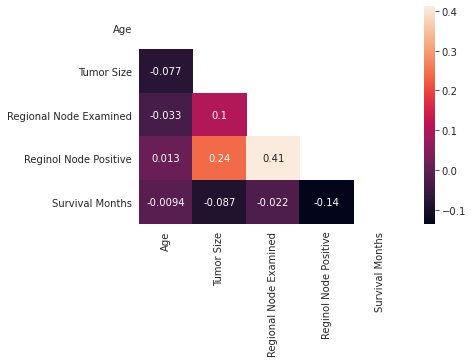

In [37]:
correlation = data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask = mask, annot = True)

From the heatmap above, we can see that there is no strong  (linear) correlation between the variables.
So we need another approach to find a correlation, let's look at the data again by plotting it.

Text(0.5, 1.0, 'Status Distribution')

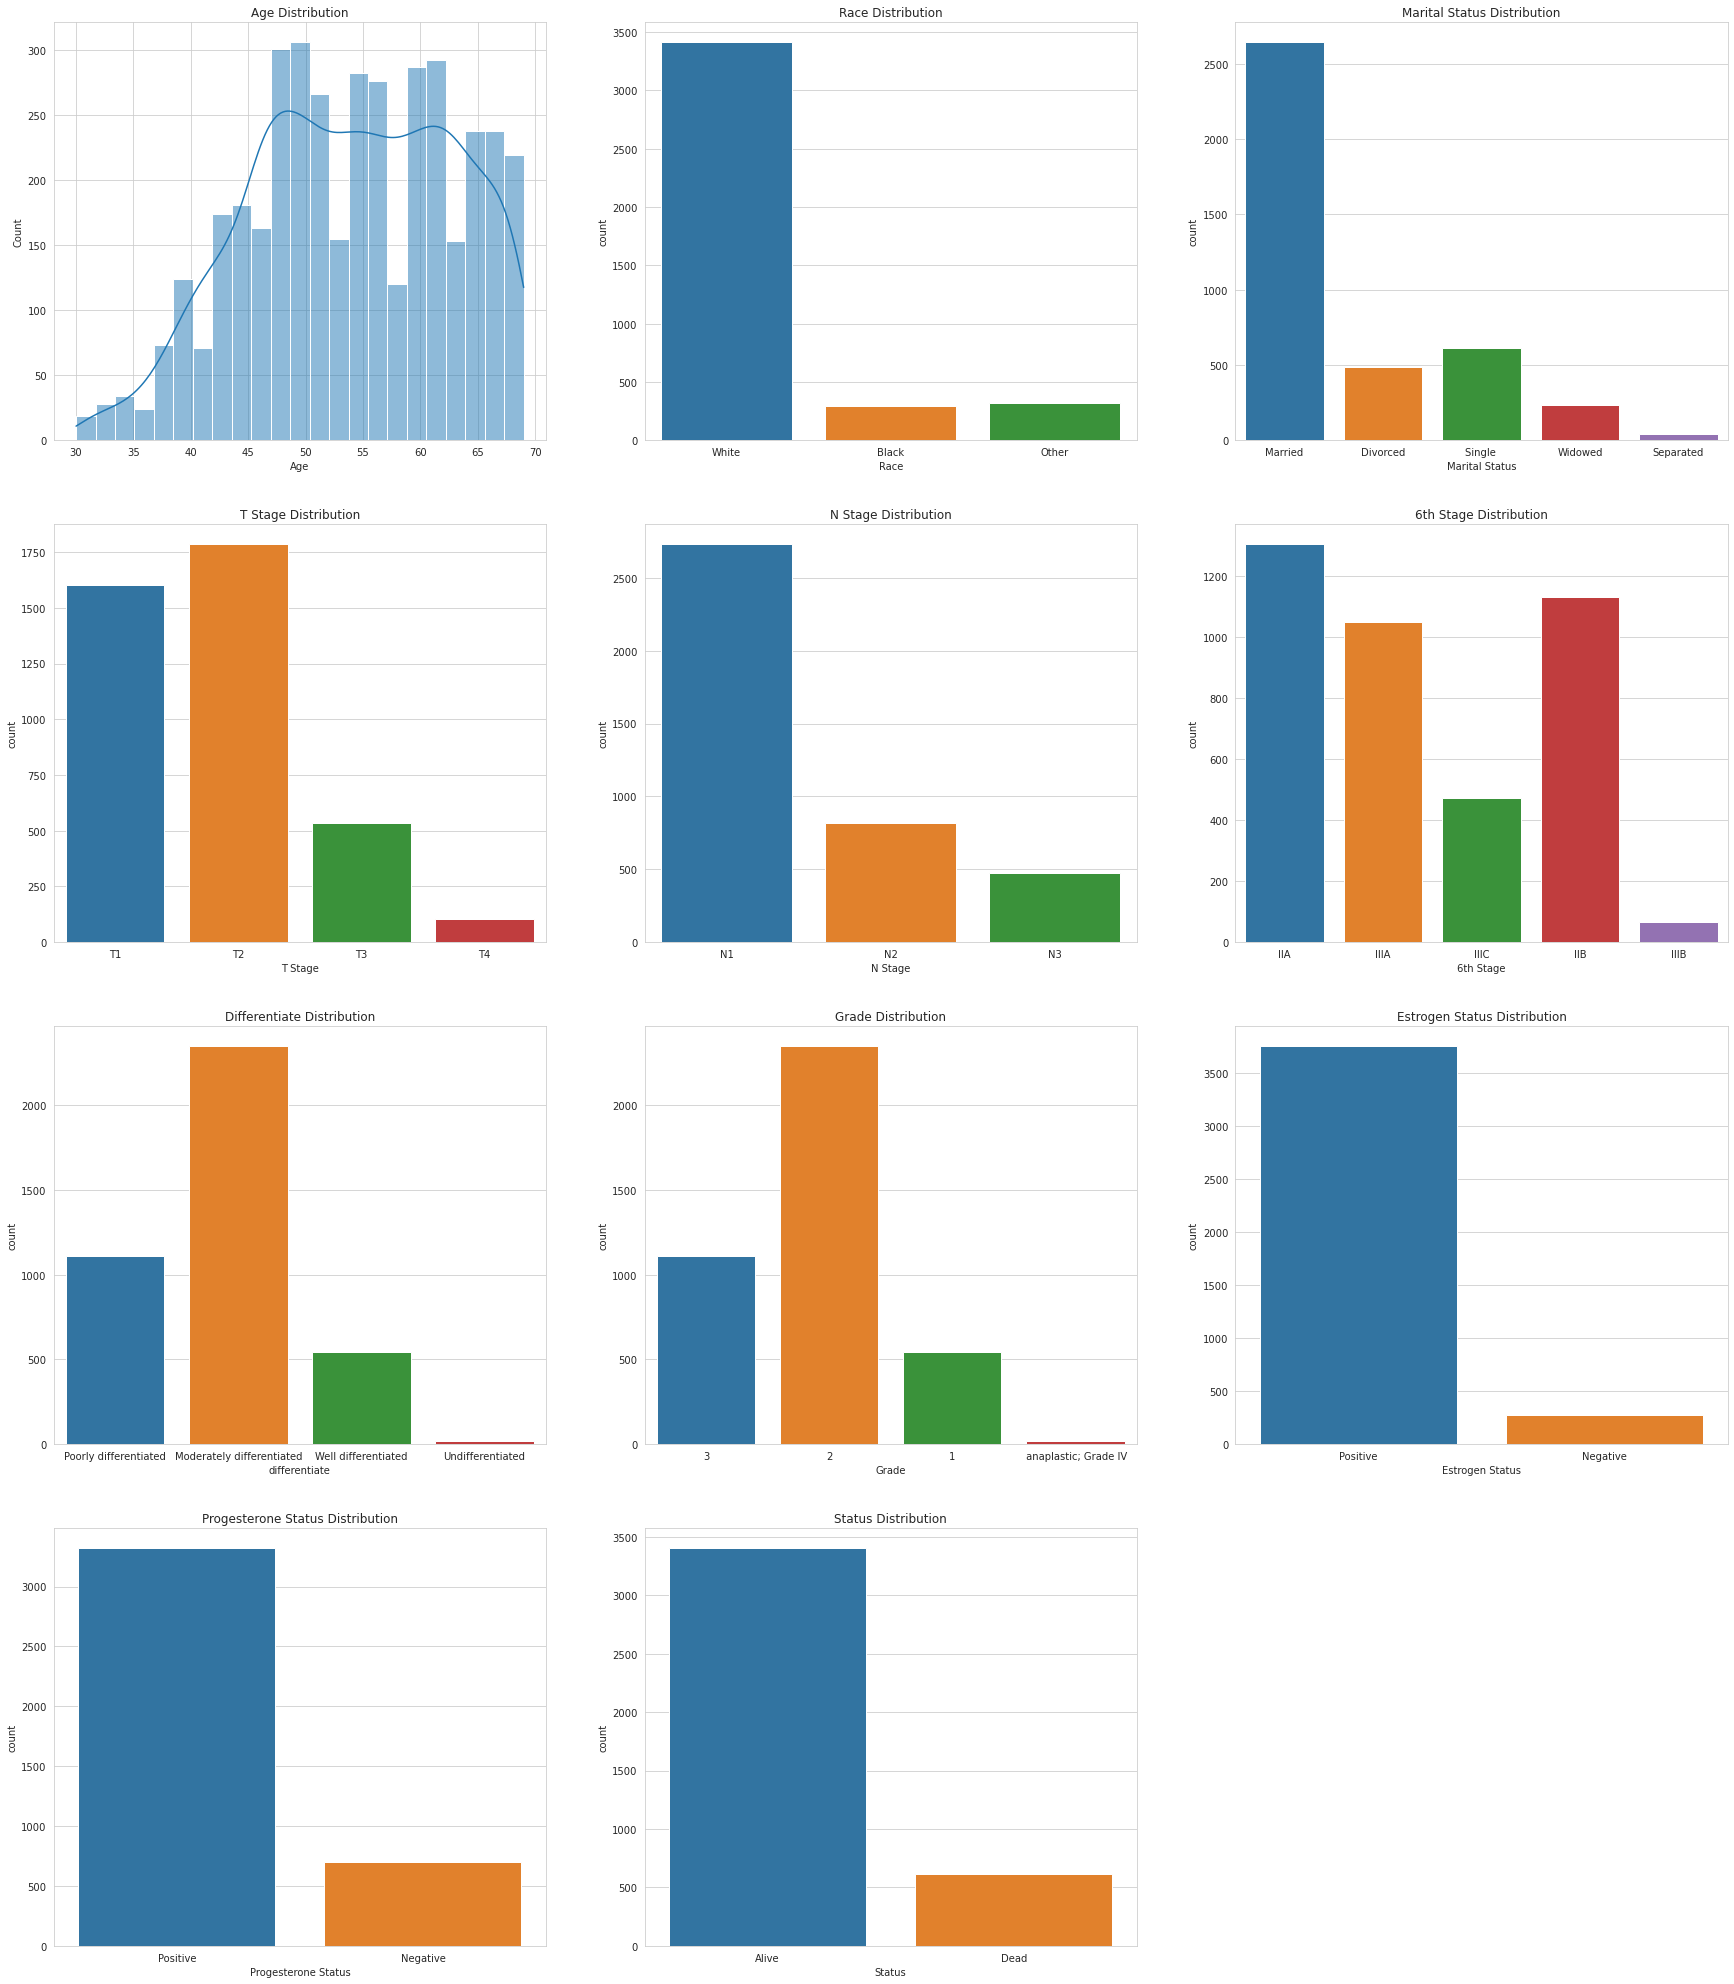

In [23]:
plt.figure(figsize = (30,100))

plt.subplot(11, 3, 1)
sns.histplot(x = 'Age', data = data, kde = True)
plt.title("Age Distribution")

plt.subplot(11, 3, 2)
sns.countplot(x = 'Race', data = data)
plt.title("Race Distribution")

plt.subplot(11, 3, 3)
sns.countplot(x = 'Marital Status', data = data)
plt.title("Marital Status Distribution")

plt.subplot(11, 3 ,4)
sns.countplot(x = 'T Stage', data = data)
plt.title("T Stage Distribution")

plt.subplot(11, 3 ,5)
sns.countplot(x = 'N Stage', data = data)
plt.title("N Stage Distribution")

plt.subplot(11, 3 ,6)
sns.countplot(x = '6th Stage', data = data)
plt.title("6th Stage Distribution")

plt.subplot(11, 3 ,7)
sns.countplot(x = 'differentiate', data = data)
plt.title("Differentiate Distribution")

plt.subplot(11, 3 ,8)
sns.countplot(x = 'Grade', data = data)
plt.title("Grade Distribution")

plt.subplot(11, 3 ,9)
sns.countplot(x = 'Estrogen Status', data = data)
plt.title("Estrogen Status Distribution")

plt.subplot(11, 3 ,10)
sns.countplot(x = 'Progesterone Status', data = data)
plt.title("Progesterone Status Distribution")

plt.subplot(11, 3 ,11)
sns.countplot(x = 'Status', data = data)
plt.title("Status Distribution")

From the plots above we can conclude that:
- Most of the patients are white, between the ages of 45-70 and married.
- The common cancer grade is 2, meaning that the cancer cells don't look like normal cells and are growing faster than normal cells.
- 6th Stage is a combination of T stage and N stage. We can see that the commons stages are IIA, IIB and IIIA.
- Differentiate describes how much or how little tumor tissue looks like the normal tissue it came from. Here. we can see that most of the tumors are moderatly differentiated, meaning that the cancer cells tend to grow and spread more fast than poorly differentiated or well-differentiated cancer cells.
- Most of the tumors have receptors for estrogen and progesterone.
- Most of the patients are alive.

### Model Building
To predict if a patient will die or not, there is need of classification approches.

First, let's split the data to feature matrix (X) and target variable (y).

In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

##### Encoding the categorial variables 

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3,4,5,6,8,10,11])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [33]:
print(X.shape)
X

(4024, 36)


array([[0.0, 0.0, 1.0, ..., 24, 1, 60],
       [0.0, 0.0, 1.0, ..., 14, 5, 62],
       [0.0, 0.0, 1.0, ..., 14, 7, 75],
       ...,
       [0.0, 0.0, 1.0, ..., 11, 3, 69],
       [1.0, 0.0, 0.0, ..., 11, 1, 72],
       [0.0, 0.0, 1.0, ..., 7, 2, 100]], dtype=object)

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(np.unique(y))
print(le.classes_)
y = le.transform(y)

['Alive' 'Dead']


In [35]:
y

array([0, 0, 0, ..., 0, 0, 0])

Alive - 0

Dead - 1

##### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now, let's try some classification algorithms to predict whether a patient will die given the features in the data frame.

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [13]:
def fit_predict_accuracy(clf, Xtrain, ytrain, Xtest, ytest):
    clf.fit(Xtrain, ytrain)
    
    y_pred = clf.predict(Xtest)
    
    from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
    print("prediction vs real")
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), ytest.reshape(len(ytest), 1)),
                     axis=1))
    cm = confusion_matrix(ytest, y_pred)
    print("\nconfusion matrix\n", cm)
    print("accuracy score: ",accuracy_score(ytest, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
    sns.set_style("white")
    disp.plot()
    return accuracy_score(ytest, y_pred)

In [14]:
acc_dict = {"Logistic regression": 0,
                "SVM": 0,
                "Kernel SVM": 0,
                "K-NN": 0,
                "Decision tree": 0}

#### **Logistic Regression**

prediction vs real
[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]

confusion matrix
 [[668  13]
 [ 75  49]]
accuracy score:  0.8906832298136645


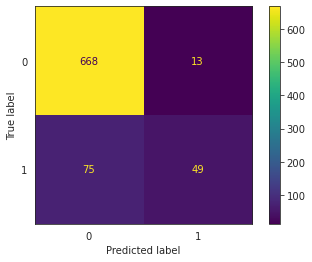

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

acc_dict["Logistic regression"] = fit_predict_accuracy(classifier, X_train, y_train, X_test, y_test)

#### **SVM**

prediction vs real
[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]

confusion matrix
 [[670  11]
 [ 76  48]]
accuracy score:  0.8919254658385093


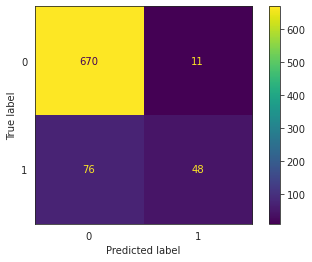

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)

acc_dict["SVM"] = fit_predict_accuracy(classifier, X_train, y_train, X_test, y_test)

#### **Kernel SVM**

prediction vs real
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]

confusion matrix
 [[671  10]
 [ 85  39]]
accuracy score:  0.8819875776397516


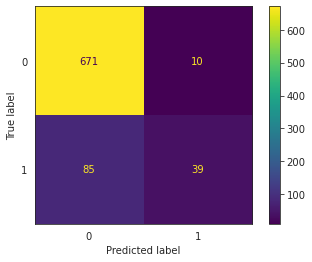

In [17]:
classifier = SVC(kernel='rbf', random_state=0)

acc_dict["Kernel SVM"] = fit_predict_accuracy(classifier, X_train, y_train, X_test, y_test)

#### **K-NN**

prediction vs real
[[1 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]

confusion matrix
 [[666  15]
 [100  24]]
accuracy score:  0.8571428571428571


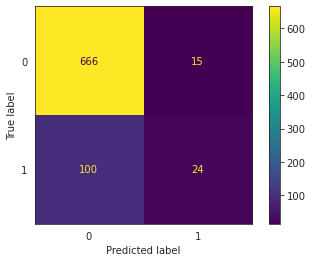

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)

acc_dict["K-NN"] = fit_predict_accuracy(classifier, X_train, y_train, X_test, y_test)

#### **Decision Tree**

prediction vs real
[[1 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]

confusion matrix
 [[619  62]
 [ 78  46]]
accuracy score:  0.8260869565217391


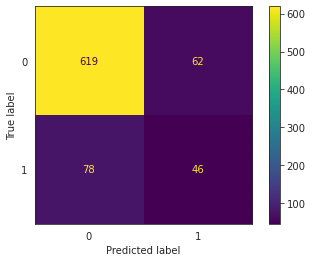

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

acc_dict["Decision tree"] = fit_predict_accuracy(classifier, X_train, y_train, X_test, y_test)

We can see that none of the models above represent good performence. The data may contain some features that doesn't contributes to the model, so we'll try to reduce features using the feature selection class from Sicikit-learn.

There is no need to do feature selection to the decision tree model, because the algorithm perform feature selection automatically as part of learning the model.  
My guess is the race and martial status will not be included after the selection.

In [20]:
global best_acc_dict
best_acc_dict = {"Logistic regression": [0, 36],
                "SVM": [0, 36],
                "Kernel SVM": [0, 36],
                "K-NN": [0, 36],
                "Decision tree": [acc_dict['Decision tree'],"all"]}
global methods_list
methods_list = list(best_acc_dict.keys())

In [21]:
def get_best_n_featuresacc_score(j, clf, Xtrain, ytrain, Xtest, ytest):
    global best_acc_dict
    
    clf.fit(Xtrain, ytrain)
    y_pred = clf.predict(Xtest)
    acc_score = accuracy_score(ytest, y_pred)
    if best_acc_dict[j][0] < acc_score:
        best_acc_dict[j][0] = acc_score
        best_acc_dict[j][1] = i


In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

for i in range(1, 37):
    SKB = SelectKBest(chi2, k=i)
    X_new = SKB.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2,
                                                    random_state=0)
    for n, j in enumerate(methods_list):
        # Logisitic regression
        if n == 0:
            classifier = LogisticRegression(max_iter = 1000,random_state=0)
            get_best_n_featuresacc_score(j, classifier, X_train, y_train, X_test, y_test)
        
        if n == 1:
            classifier = SVC(kernel='linear', random_state=0)
            get_best_n_featuresacc_score(j, classifier, X_train, y_train, X_test, y_test)
            
        if n == 2:
            classifier = SVC(kernel='rbf', random_state=0)
            get_best_n_featuresacc_score(j, classifier, X_train, y_train, X_test, y_test)
        
        if n == 3:
            classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
            get_best_n_featuresacc_score(j, classifier, X_train, y_train, X_test, y_test)
            
    

In [95]:
best_acc_dict

{'Logistic regression': [0.8968944099378882, 15],
 'SVM': [0.8968944099378882, 19],
 'Kernel SVM': [0.8981366459627329, 2],
 'K-NN': [0.8944099378881988, 19],
 'Decision tree': [0.884472049689441, 1]}

Now, let's create data frame with the accuracy scores, before and after the feature selection and with the relevant columns we got from SelectKBest class.

In [29]:
def get_features_name(best_k, X, y):
    skb = SelectKBest(chi2, k=best_k)
    X_new = skb.fit_transform(X, y)
    cols = skb.get_support(indices=True)
#     features = X[:,cols] # feature matrix without column names, np array
    column_names = pd.get_dummies(data).columns[cols]

    return column_names

In [30]:
for n, j in enumerate(methods_list):
    print('\033[1m' + j, " best features:\n" + '\033[0m', get_features_name(best_acc_dict[j][1], X, y), "\n")

Logistic regression  best features:
 Index(['Marital Status_Divorced', 'Marital Status_Single ',
       'Marital Status_Widowed', 'T Stage_T2', 'T Stage_T3', 'N Stage_N3',
       '6th Stage_IIB', '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Poorly differentiated',
       'differentiate_Well differentiated', 'Grade_4', 'A Stage_Distant',
       'A Stage_Regional', 'Estrogen Status_Negative'],
      dtype='object') 

SVM  best features:
 Index(['Age', 'Marital Status_Divorced', 'Marital Status_Single ',
       'Marital Status_Widowed', 'T Stage_T2', 'T Stage_T3', 'N Stage_N3',
       '6th Stage_IIB', '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Poorly differentiated',
       'differentiate_Well differentiated', 'Grade_1', 'Grade_2', 'Grade_3',
       'Grade_4', 'A Stage_Distant', 'A Stage_Regional',
       'Estrogen Status_Negative'],
      dtype='object') 

Kernel SVM  best features:
 Index(['A Stage_Regional', 'Estrogen Status_Negative'], dtype='object') 

K-N

So, I was right about the race was not included in the features after the selection, but I was wrong about the martial status, that does have some influence after all.

In [31]:
acc_df =  pd.DataFrame.from_dict(acc_dict, orient='index')
acc_df.rename(columns={0:'Accuracy score before feature selection'}, inplace=True)
acc_df

,Accuracy score before feature selection
Logistic regression,0.890683
SVM,0.891925
Kernel SVM,0.881988
K-NN,0.857143
Decision tree,0.826087


In [32]:
best_acc_df = pd.DataFrame.from_dict(best_acc_dict, orient='index')
best_acc_df.rename(columns={0:'Accuracy score after feature selection', 1:"Number of features"}, inplace=True)
best_acc_df

,Accuracy score after feature selection,Number of features
Logistic regression,0.896894,15
SVM,0.896894,19
Kernel SVM,0.898137,2
K-NN,0.894410,19
Decision tree,0.826087,all


In [33]:
comp_df = acc_df.join(best_acc_df)
comp_df['Columns names'] = [list(get_features_name(best_acc_dict[j][1], X, y)) for j in methods_list]
comp_df

,Accuracy score before feature selection,Accuracy score after feature selection,Number of features,Columns names
Logistic regression,0.890683,0.896894,15,"[Marital Status_Divorced, Marital Status_Singl..."
SVM,0.891925,0.896894,19,"[Age, Marital Status_Divorced, Marital Status_..."
Kernel SVM,0.881988,0.898137,2,"[A Stage_Regional, Estrogen Status_Negative]"
K-NN,0.857143,0.894410,19,"[Age, Marital Status_Divorced, Marital Status_..."
Decision tree,0.826087,0.826087,all,"[Age, Tumor Size, Regional Node Examined, Regi..."


### Conclusion
This breast cancer dataset contain information about 4024 paitents.
Most of the paitents are white, between the ages 45-70, married and alive.

There is no strong correlation among the variables. Using some classification algorithms we didn't get very good performences, although, we succeeded to improve the accuracy score a bit by using feature selection.
The two common features to all algorithms are- A stage-Regional and Estrogen Status-Negative, meaning that those are most meaningful features to predict if a patients will die.

I think that one significant of the reasons why we didn't get a better accuracy score, is the fact that there are a lot of alive patients compare to died paitents. This imbalancing makes it hard to the models to learn about paitents who are not alive, and hence to predict if patients will die.